<a href="https://colab.research.google.com/github/Chandu106/MultiClassification_Shoes_project02/blob/main/Snekers_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

# Unzip the downloaded file from github or kaggle "https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged?resource=download"
zip_ref = zipfile.ZipFile("/content/archive (4).zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

# Walk through  directory and list number of files
print("TRAIN---")
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("TEST---")
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

TRAIN---
There are 3 directories and 0 images in 'train'.
There are 0 directories and 237 images in 'train/adidas'.
There are 0 directories and 237 images in 'train/converse'.
There are 0 directories and 237 images in 'train/nike'.
TEST---
There are 3 directories and 0 images in 'test'.
There are 0 directories and 38 images in 'test/adidas'.
There are 0 directories and 38 images in 'test/converse'.
There are 0 directories and 38 images in 'test/nike'.


In [4]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
train_dir = "train/"
test_dir = "test/"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
     

['adidas' 'converse' 'nike']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (240, 240, 3)


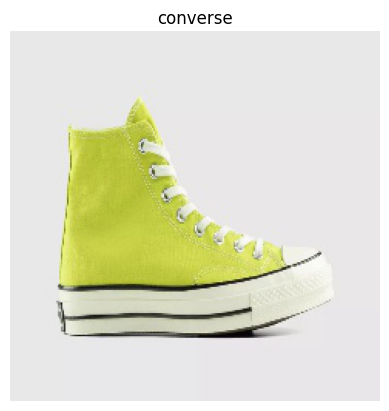

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name
     

In [9]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

In [ ]:
model_01 = Sequential()

model_01.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3),activation='relu'))
model_01.add(MaxPool2D(pool_size=(2,2)))

model_01.add(Flatten())

model_01.add(Dense(256, activation = 'relu'))
model_01.add(Dense(3, activation = 'softmax'))

model_01.compile(loss = 'categorical_crossentropy',
                 optimizer = 'Adam',
                 metrics = ['accuracy'])

history_01 = model_01.fit(train_data,
                          epochs = 5,
                          steps_per_epoch=len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
23/23 [==============================] - 13s 115ms/step - loss: 25.7402 - accuracy: 0.3179 - val_loss: 3.1275 - val_accuracy: 0.4123
Epoch 2/5
23/23 [==============================] - 2s 89ms/step - loss: 1.5090 - accuracy: 0.5668 - val_loss: 0.9481 - val_accuracy: 0.5789
Epoch 3/5
23/23 [==============================] - 2s 88ms/step - loss: 0.3757 - accuracy: 0.8636 - val_loss: 1.1877 - val_accuracy: 0.5088
Epoch 4/5
23/23 [==============================] - 3s 141ms/step - loss: 0.1607 - accuracy: 0.9578 - val_loss: 1.5175 - val_accuracy: 0.4737
Epoch 5/5
23/23 [==============================] - 4s 170ms/step - loss: 0.0762 - accuracy: 0.9817 - val_loss: 1.3339 - val_accuracy: 0.5351


In [ ]:
model_01.evaluate(test_data)

4/4 [==============================] - 0s 106ms/step - loss: 1.3339 - accuracy: 0.5351


[1.3339452743530273, 0.5350877046585083]

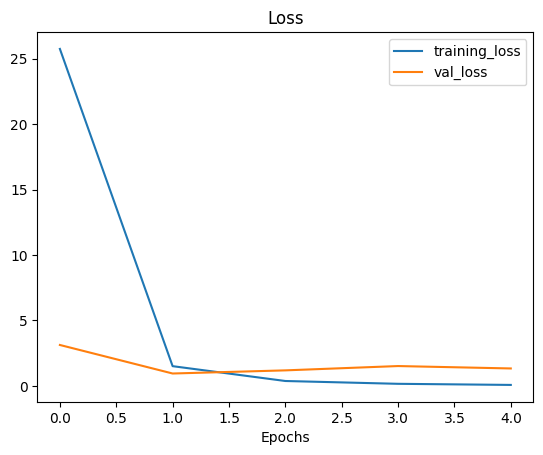

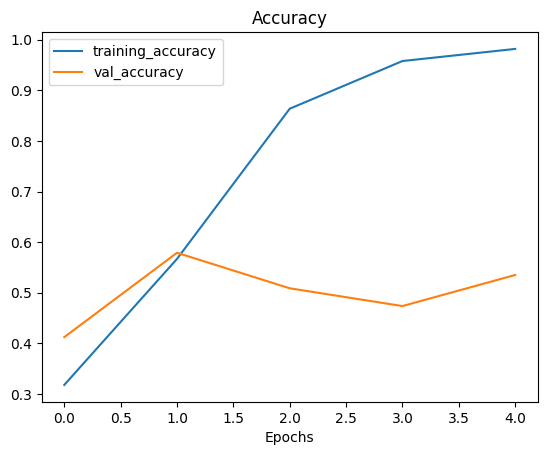

In [ ]:
plot_loss_curves(history_01)

In [ ]:
model_01.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 394272)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               100933888 
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 100,935,555
Trainable params: 100,935,555
Non-trainable params: 0
________________________________________

In [ ]:
model_02 = Sequential()

model_02.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_02.add(MaxPool2D(2))

model_02.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_02.add(MaxPool2D(2))

model_02.add(Flatten())

model_02.add(Dense(256, activation='relu'))
model_02.add(Dense(3, activation= 'softmax'))

model_02.compile(loss = 'categorical_crossentropy',
                 optimizer= 'Adam',
                 metrics = ['accuracy'])

history_02 = model_02.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
23/23 [==============================] - 4s 95ms/step - loss: 4.0196 - accuracy: 0.3404 - val_loss: 1.0862 - val_accuracy: 0.3509
Epoch 2/5
23/23 [==============================] - 2s 84ms/step - loss: 1.0073 - accuracy: 0.4838 - val_loss: 0.9906 - val_accuracy: 0.5000
Epoch 3/5
23/23 [==============================] - 2s 102ms/step - loss: 0.7465 - accuracy: 0.6948 - val_loss: 1.1384 - val_accuracy: 0.4825
Epoch 4/5
23/23 [==============================] - 2s 99ms/step - loss: 0.3998 - accuracy: 0.8875 - val_loss: 1.2772 - val_accuracy: 0.4912
Epoch 5/5
23/23 [==============================] - 2s 85ms/step - loss: 0.1628 - accuracy: 0.9634 - val_loss: 1.2874 - val_accuracy: 0.5263


In [ ]:
model_02.evaluate(test_data)

4/4 [==============================] - 0s 56ms/step - loss: 1.2874 - accuracy: 0.5263


[1.2874244451522827, 0.5263158082962036]

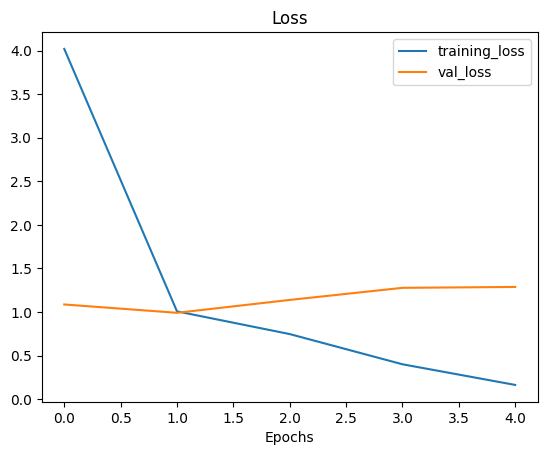

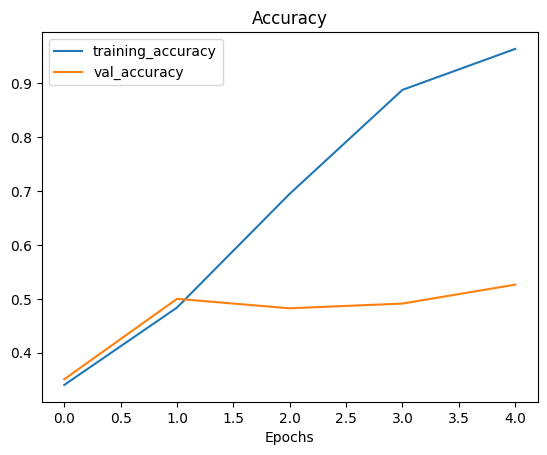

In [ ]:
plot_loss_curves(history_02)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')
     

Found 711 images belonging to 3 classes.


In [ ]:
model_03 = tf.keras.models.clone_model(model_02)

model_03.compile(loss = 'categorical_crossentropy',
                 optimizer = 'Adam',
                 metrics = ['accuracy'])

history_03 = model_03.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
23/23 [==============================] - 14s 551ms/step - loss: 3.0730 - accuracy: 0.3221 - val_loss: 1.0871 - val_accuracy: 0.3333
Epoch 2/5
23/23 [==============================] - 11s 475ms/step - loss: 1.0891 - accuracy: 0.3601 - val_loss: 1.0865 - val_accuracy: 0.3772
Epoch 3/5
23/23 [==============================] - 9s 393ms/step - loss: 1.0819 - accuracy: 0.4037 - val_loss: 1.0658 - val_accuracy: 0.3772
Epoch 4/5
23/23 [==============================] - 8s 347ms/step - loss: 1.0707 - accuracy: 0.4107 - val_loss: 1.0733 - val_accuracy: 0.3947
Epoch 5/5
23/23 [==============================] - 8s 353ms/step - loss: 1.0574 - accuracy: 0.4501 - val_loss: 1.0530 - val_accuracy: 0.4123


In [ ]:
model_03.evaluate(test_data)

4/4 [==============================] - 0s 56ms/step - loss: 1.0530 - accuracy: 0.4123


[1.053015112876892, 0.41228070855140686]

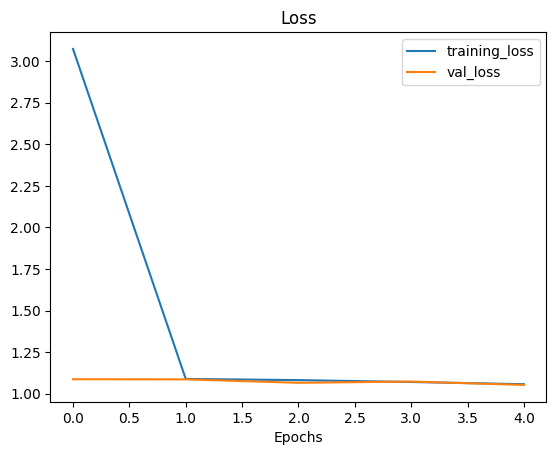

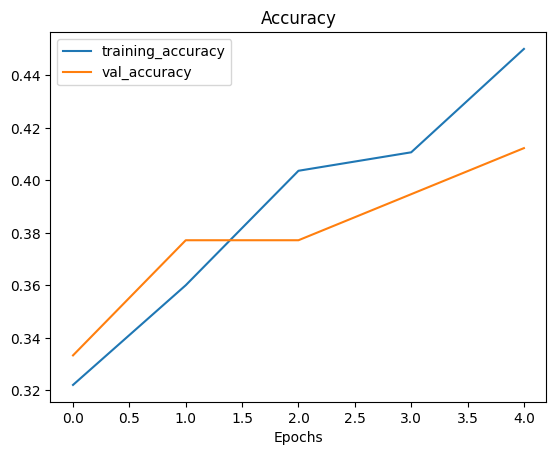

In [ ]:
plot_loss_curves(history_03)

In [ ]:
model_04 = tf.keras.models.clone_model(model_01)

model_04.compile(loss = 'categorical_crossentropy',
                 optimizer = 'Adam',
                 metrics = ['accuracy'])

history_04 = model_04.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
23/23 [==============================] - 13s 485ms/step - loss: 61.2422 - accuracy: 0.3277 - val_loss: 15.8094 - val_accuracy: 0.3333
Epoch 2/5
23/23 [==============================] - 13s 583ms/step - loss: 6.3119 - accuracy: 0.3643 - val_loss: 2.9836 - val_accuracy: 0.3333
Epoch 3/5
23/23 [==============================] - 9s 391ms/step - loss: 1.6712 - accuracy: 0.3333 - val_loss: 1.1653 - val_accuracy: 0.3333
Epoch 4/5
23/23 [==============================] - 9s 393ms/step - loss: 1.1240 - accuracy: 0.3994 - val_loss: 1.0707 - val_accuracy: 0.4649
Epoch 5/5
23/23 [==============================] - 8s 364ms/step - loss: 1.1173 - accuracy: 0.3840 - val_loss: 1.0560 - val_accuracy: 0.3772


In [ ]:
model_04.evaluate(test_data)

4/4 [==============================] - 0s 59ms/step - loss: 1.0560 - accuracy: 0.3772


[1.055953025817871, 0.37719297409057617]

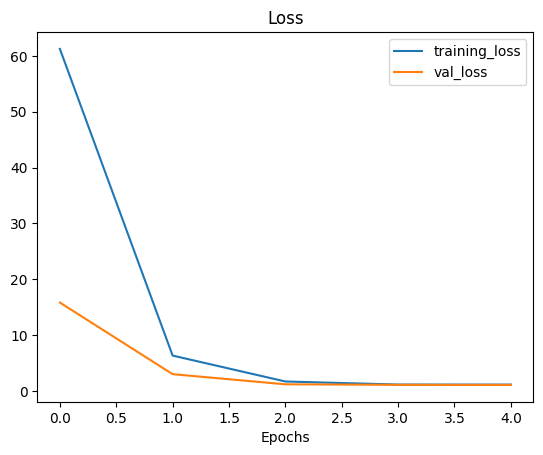

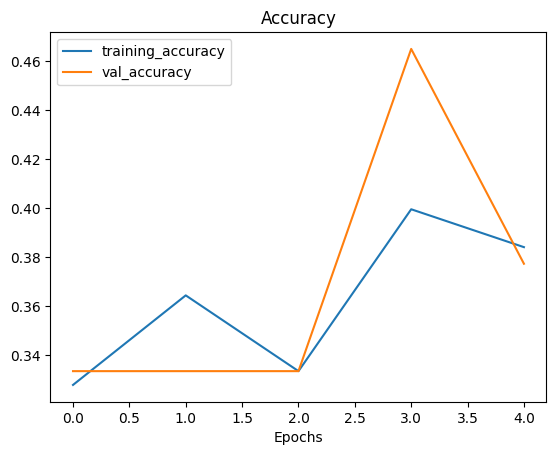

In [ ]:
plot_loss_curves(history_04)

In [ ]:
model_05 = Sequential()

model_05.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_05.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_05.add(MaxPool2D(2))

model_05.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_05.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_05.add(MaxPool2D(2))

model_05.add(Flatten())

model_05.add(Dense(256, activation='relu'))
model_05.add(Dense(3, activation= 'softmax'))

model_05.compile(loss = 'categorical_crossentropy',
                 optimizer= 'Adam',
                 metrics = ['accuracy'])

history_05 = model_05.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
23/23 [==============================] - 9s 214ms/step - loss: 1.8795 - accuracy: 0.3643 - val_loss: 1.0923 - val_accuracy: 0.4474
Epoch 2/5
23/23 [==============================] - 3s 109ms/step - loss: 1.0444 - accuracy: 0.5246 - val_loss: 1.0565 - val_accuracy: 0.4561
Epoch 3/5
23/23 [==============================] - 3s 120ms/step - loss: 0.7967 - accuracy: 0.6695 - val_loss: 1.3444 - val_accuracy: 0.4825
Epoch 4/5
23/23 [==============================] - 5s 210ms/step - loss: 0.4562 - accuracy: 0.8242 - val_loss: 1.5674 - val_accuracy: 0.4298
Epoch 5/5
23/23 [==============================] - 3s 146ms/step - loss: 0.2629 - accuracy: 0.9001 - val_loss: 1.8529 - val_accuracy: 0.4737


In [ ]:
model_05.evaluate(test_data)

4/4 [==============================] - 0s 68ms/step - loss: 1.8529 - accuracy: 0.4737


[1.8529300689697266, 0.4736842215061188]

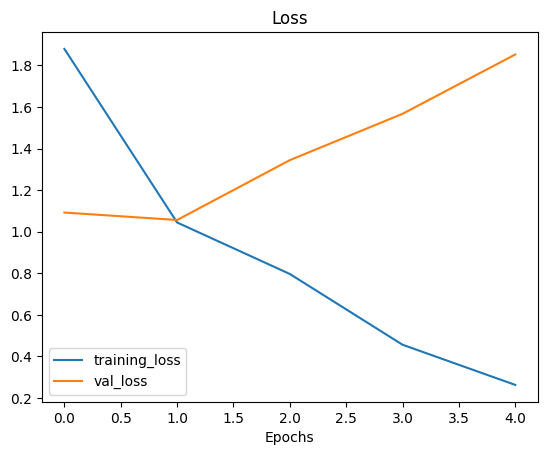

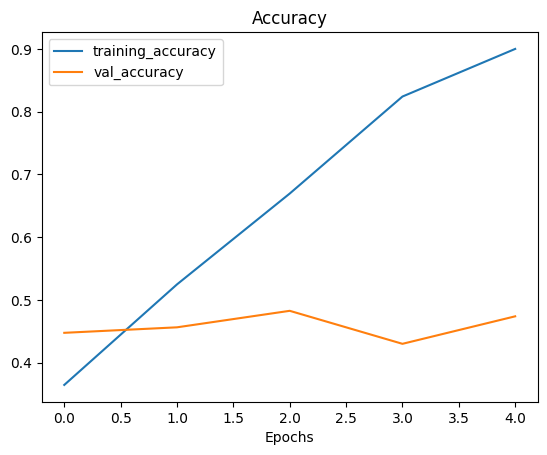

In [ ]:
plot_loss_curves(history_05)

In [11]:
model_06 = Sequential()

model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(MaxPool2D(2))

model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(MaxPool2D(2))

model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(MaxPool2D(2))

model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model_06.add(Conv2D(32,3,activation = 'relu', input_shape=(224,224,3)))
model_06.add(MaxPool2D(2))

model_06.add(Flatten())

model_06.add(Dense(256, activation='relu'))
model_06.add(Dense(3, activation= 'softmax'))

model_06.compile(loss = 'categorical_crossentropy',
                 optimizer= 'Adam',
                 metrics = ['accuracy'])

history_06 = model_06.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
23/23 [==============================] - 31s 548ms/step - loss: 1.1007 - accuracy: 0.3193 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/5
23/23 [==============================] - 4s 169ms/step - loss: 1.0992 - accuracy: 0.3249 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/5
23/23 [==============================] - 4s 171ms/step - loss: 1.0989 - accuracy: 0.3207 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/5
23/23 [==============================] - 4s 194ms/step - loss: 1.0989 - accuracy: 0.3305 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/5
23/23 [==============================] - 5s 232ms/step - loss: 1.0987 - accuracy: 0.3249 - val_loss: 1.0986 - val_accuracy: 0.3333


In [12]:
model_06.evaluate(test_data)

4/4 [==============================] - 0s 66ms/step - loss: 1.0986 - accuracy: 0.3333


[1.0986151695251465, 0.3333333432674408]

# **TRANSFER LEARNING**

In [17]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [18]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


In [19]:
def create_model(model_url, num_classes=3):
 
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [20]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])



In [21]:
resnet_history = resnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data))

Epoch 1/5
23/23 [==============================] - 11s 261ms/step - loss: 1.1352 - accuracy: 0.4796 - val_loss: 0.8592 - val_accuracy: 0.6228
Epoch 2/5
23/23 [==============================] - 2s 105ms/step - loss: 0.7291 - accuracy: 0.6962 - val_loss: 0.7110 - val_accuracy: 0.7105
Epoch 3/5
23/23 [==============================] - 2s 105ms/step - loss: 0.5701 - accuracy: 0.7862 - val_loss: 0.6457 - val_accuracy: 0.7632
Epoch 4/5
23/23 [==============================] - 3s 116ms/step - loss: 0.4796 - accuracy: 0.8340 - val_loss: 0.6214 - val_accuracy: 0.7544
Epoch 5/5
23/23 [==============================] - 3s 107ms/step - loss: 0.4195 - accuracy: 0.8678 - val_loss: 0.6060 - val_accuracy: 0.7982


In [22]:
resnet_model.evaluate(test_data)

4/4 [==============================] - 0s 88ms/step - loss: 0.6060 - accuracy: 0.7982


[0.6059635877609253, 0.7982456088066101]

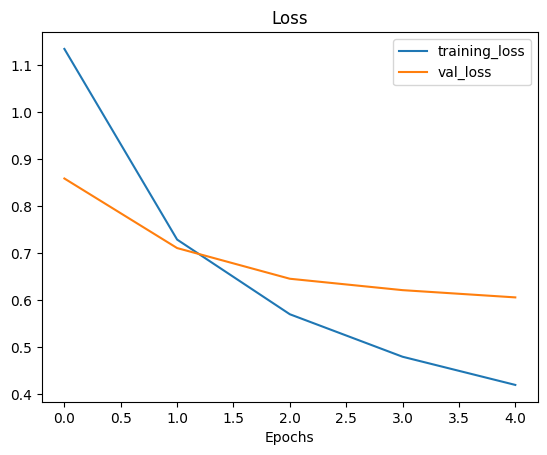

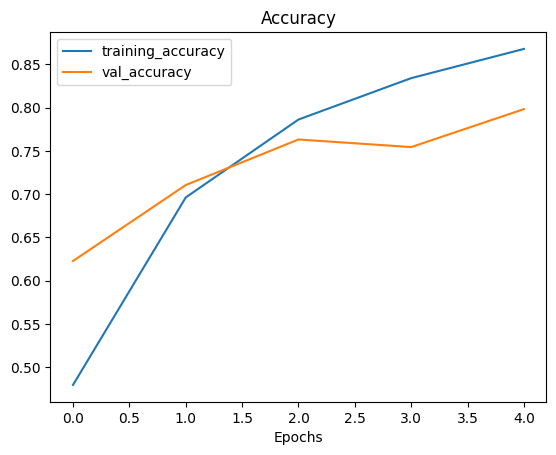

In [23]:
plot_loss_curves(resnet_history)

In [24]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, 
                                              epochs=5, 
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))


Epoch 1/5
23/23 [==============================] - 15s 192ms/step - loss: 1.0482 - accuracy: 0.4641 - val_loss: 0.8800 - val_accuracy: 0.6228
Epoch 2/5
23/23 [==============================] - 3s 115ms/step - loss: 0.7820 - accuracy: 0.7215 - val_loss: 0.7301 - val_accuracy: 0.7632
Epoch 3/5
23/23 [==============================] - 2s 93ms/step - loss: 0.6575 - accuracy: 0.7890 - val_loss: 0.6497 - val_accuracy: 0.7456
Epoch 4/5
23/23 [==============================] - 2s 98ms/step - loss: 0.5749 - accuracy: 0.8284 - val_loss: 0.6034 - val_accuracy: 0.7719
Epoch 5/5
23/23 [==============================] - 2s 96ms/step - loss: 0.5127 - accuracy: 0.8622 - val_loss: 0.5707 - val_accuracy: 0.7982


In [25]:
efficientnet_model.evaluate(test_data)

4/4 [==============================] - 0s 69ms/step - loss: 0.5707 - accuracy: 0.7982


[0.5706674456596375, 0.7982456088066101]

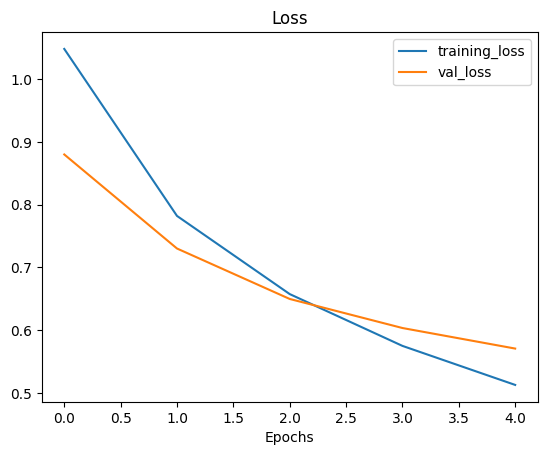

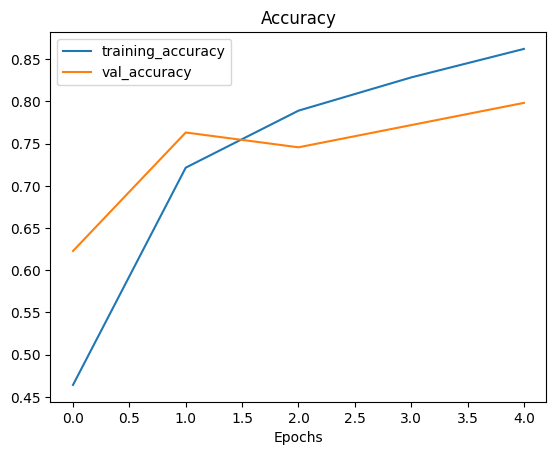

In [26]:
plot_loss_curves(efficientnet_history)

In [13]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [14]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
     

1/1 [==============================] - 0s 26ms/step


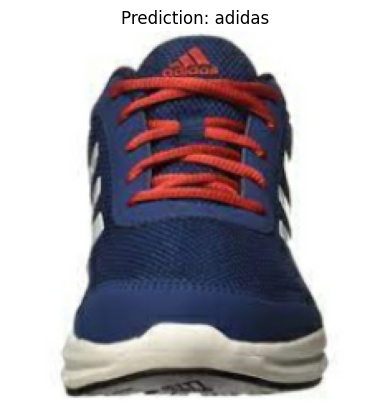

In [31]:
# Make a prediction using model_1
pred_and_plot(model=efficientnet_model, 
              filename="/content/test/adidas/23.jpg", 
              class_names=class_names)

1/1 [==============================] - 0s 40ms/step


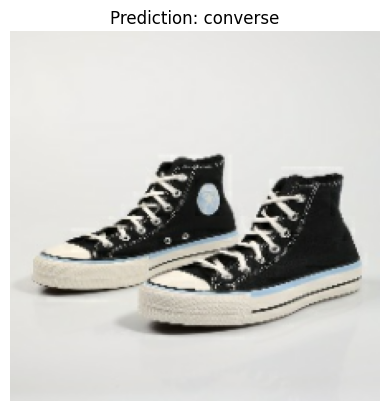

In [28]:
# Make a prediction using model_1
pred_and_plot(model=efficientnet_model, 
              filename="/content/test/converse/17.jpg", 
              class_names=class_names)

1/1 [==============================] - 0s 57ms/step


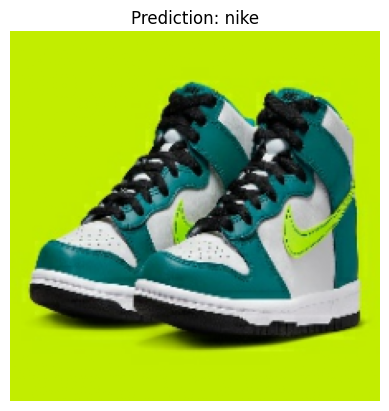

In [34]:
# Make a prediction using model_1
pred_and_plot(model=efficientnet_model, 
              filename="/content/test/nike/35.jpg", 
              class_names=class_names)